In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv('./datasets/default.csv')
# df.tail()
df.describe()

balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495

In [3]:
df.shape

(10000, 4)

<Axes: ylabel='income'>

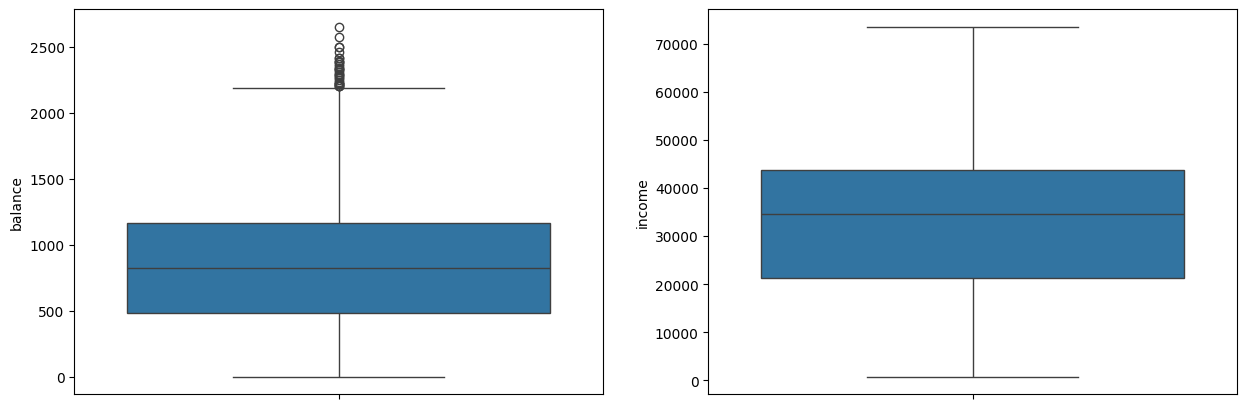

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['balance'])
plt.subplot(1,2,2)
sns.boxplot(y=df['income'])

<Axes: xlabel='student', ylabel='count'>

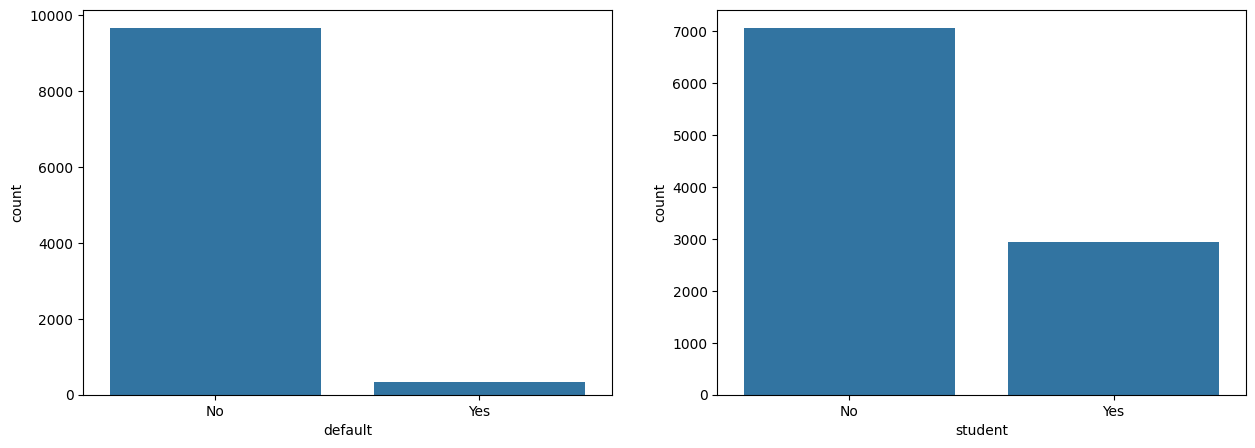

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['default'])
plt.subplot(1,2,2)
sns.countplot(x=df['student'])

In [6]:
df['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [7]:
df['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

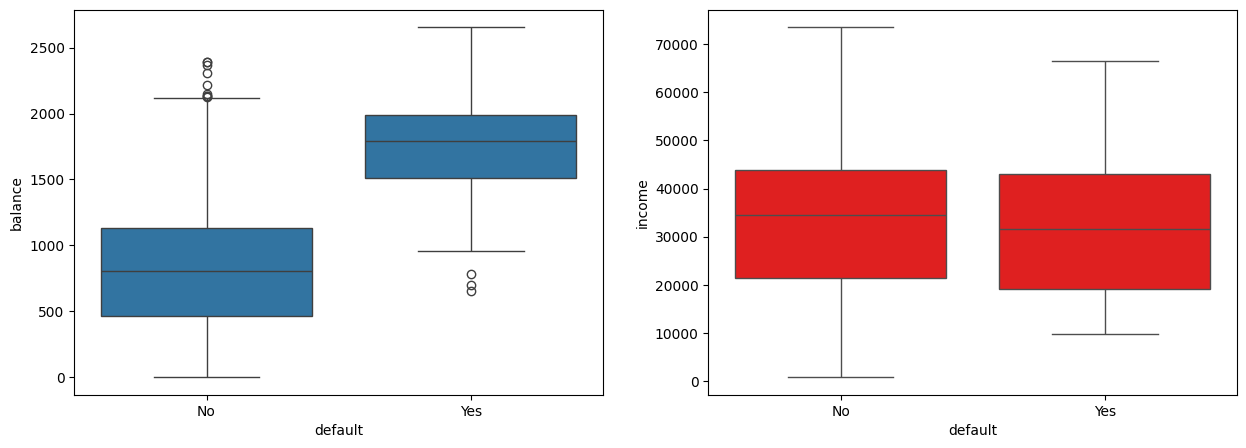

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['default'],y=df['balance'])
plt.subplot(1,2,2)
sns.boxplot(x=df['default'], y=df['income'],color='r')
plt.show()

In [9]:
pd.crosstab(df['default'],df['student'],normalize='index').round(2)

student    No   Yes
default            
No       0.71  0.29
Yes      0.62  0.38

<Axes: >

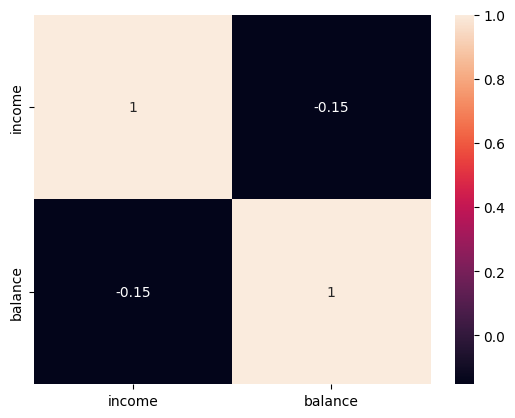

In [10]:
sns.heatmap(df[['income','balance']].corr(),annot=True)

In [11]:
df11=pd.read_csv('./datasets/default.csv')

In [12]:
df11.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [13]:
Q1,Q3=df['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [14]:
UL

2193.174308607817

In [15]:
df1=df[df['balance']>UL]

In [16]:
df1['default'].value_counts(normalize=True).round(4)

default
Yes    0.8387
No     0.1613
Name: proportion, dtype: float64

In [17]:
df1['student'].value_counts()

student
Yes    22
No      9
Name: count, dtype: int64

In [18]:
df['balance']=np.where(df['balance']>UL,UL,df['balance'])

In [19]:
df['balance']=np.where(df['balance']<LL,LL,df['balance'])

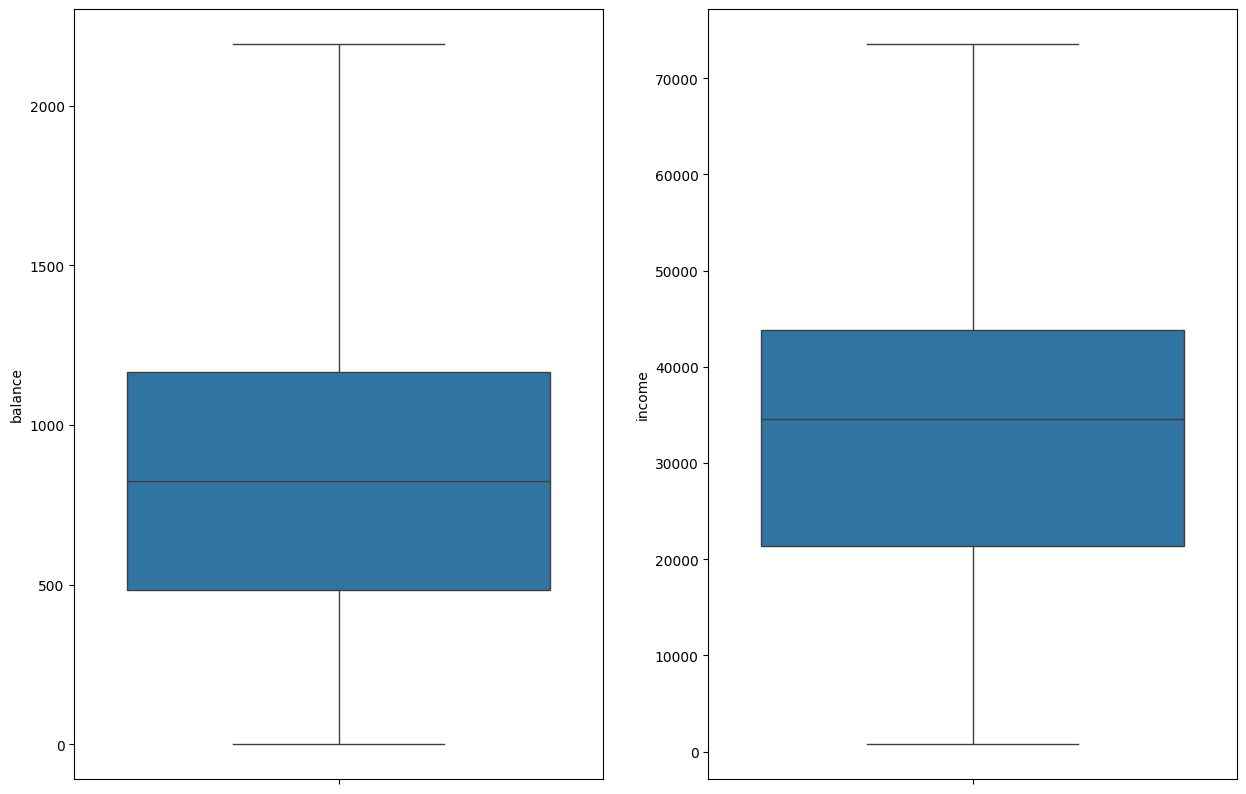

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(y=df['balance'])
plt.subplot(1,2,2)
sns.boxplot(y=df['income'])
plt.show()

In [21]:
df12=pd.read_csv('./datasets/default.csv')


In [22]:
# df7=np.where(df9['default']=='Yes')

In [23]:
df12['default'] = df12['default'].map({'Yes': 1, 'No': 0})
df12['student'] = df12['student'].map({'Yes': 1, 'No': 0})

 df10=np.where(df9['default']==1)

In [24]:
value=df11.loc[136,'default']
print(value)

Yes


In [25]:
df12.head()

default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879

In [26]:
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [34]:
x=df12.drop('default',axis=1)
y=df12['default']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [36]:
lr=LogisticRegression()

In [37]:
sm=SMOTE(random_state=33,sampling_strategy=0.75)

In [38]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [70]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
11837    1
11838    1
11839    1
11840    1
11841    1
Name: default, Length: 11842, dtype: int64

In [39]:
lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_predict=lr.predict(x_test)

In [41]:
print(x_train.dtypes)
print(y_train.dtypes)


student      int64
balance    float64
income     float64
dtype: object
int64


In [42]:
print(y_train.dtypes)

int64


In [44]:
type(df12['default'])

pandas.core.series.Series

In [45]:
confusion_matrix(y_test,y_predict)

array([[2889,   11],
       [  68,   32]])

In [47]:
(2889+32)/(11+68+32+2889)

0.9736666666666667

In [67]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])